In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
%%bash

clang++ -std=c++17 -O3 -o runtime-clang-optimized.o main.cc
clang++ -std=c++17 -O0 -o runtime-clang-unoptimized.o main.cc

g++ -std=c++17 -O3 -o runtime-gcc-optimized.o main.cc
g++ -std=c++17 -O0 -o runtime-gcc-unoptimized.o main.cc

In [3]:
%%bash

./runtime-clang-optimized.o 12 > runtime-clang-optimized.csv
./runtime-clang-unoptimized.o 12 > runtime-clang-unoptimized.csv

./runtime-gcc-optimized.o 12 > runtime-gcc-optimized.csv
./runtime-gcc-unoptimized.o 12 > runtime-gcc-unoptimized.csv

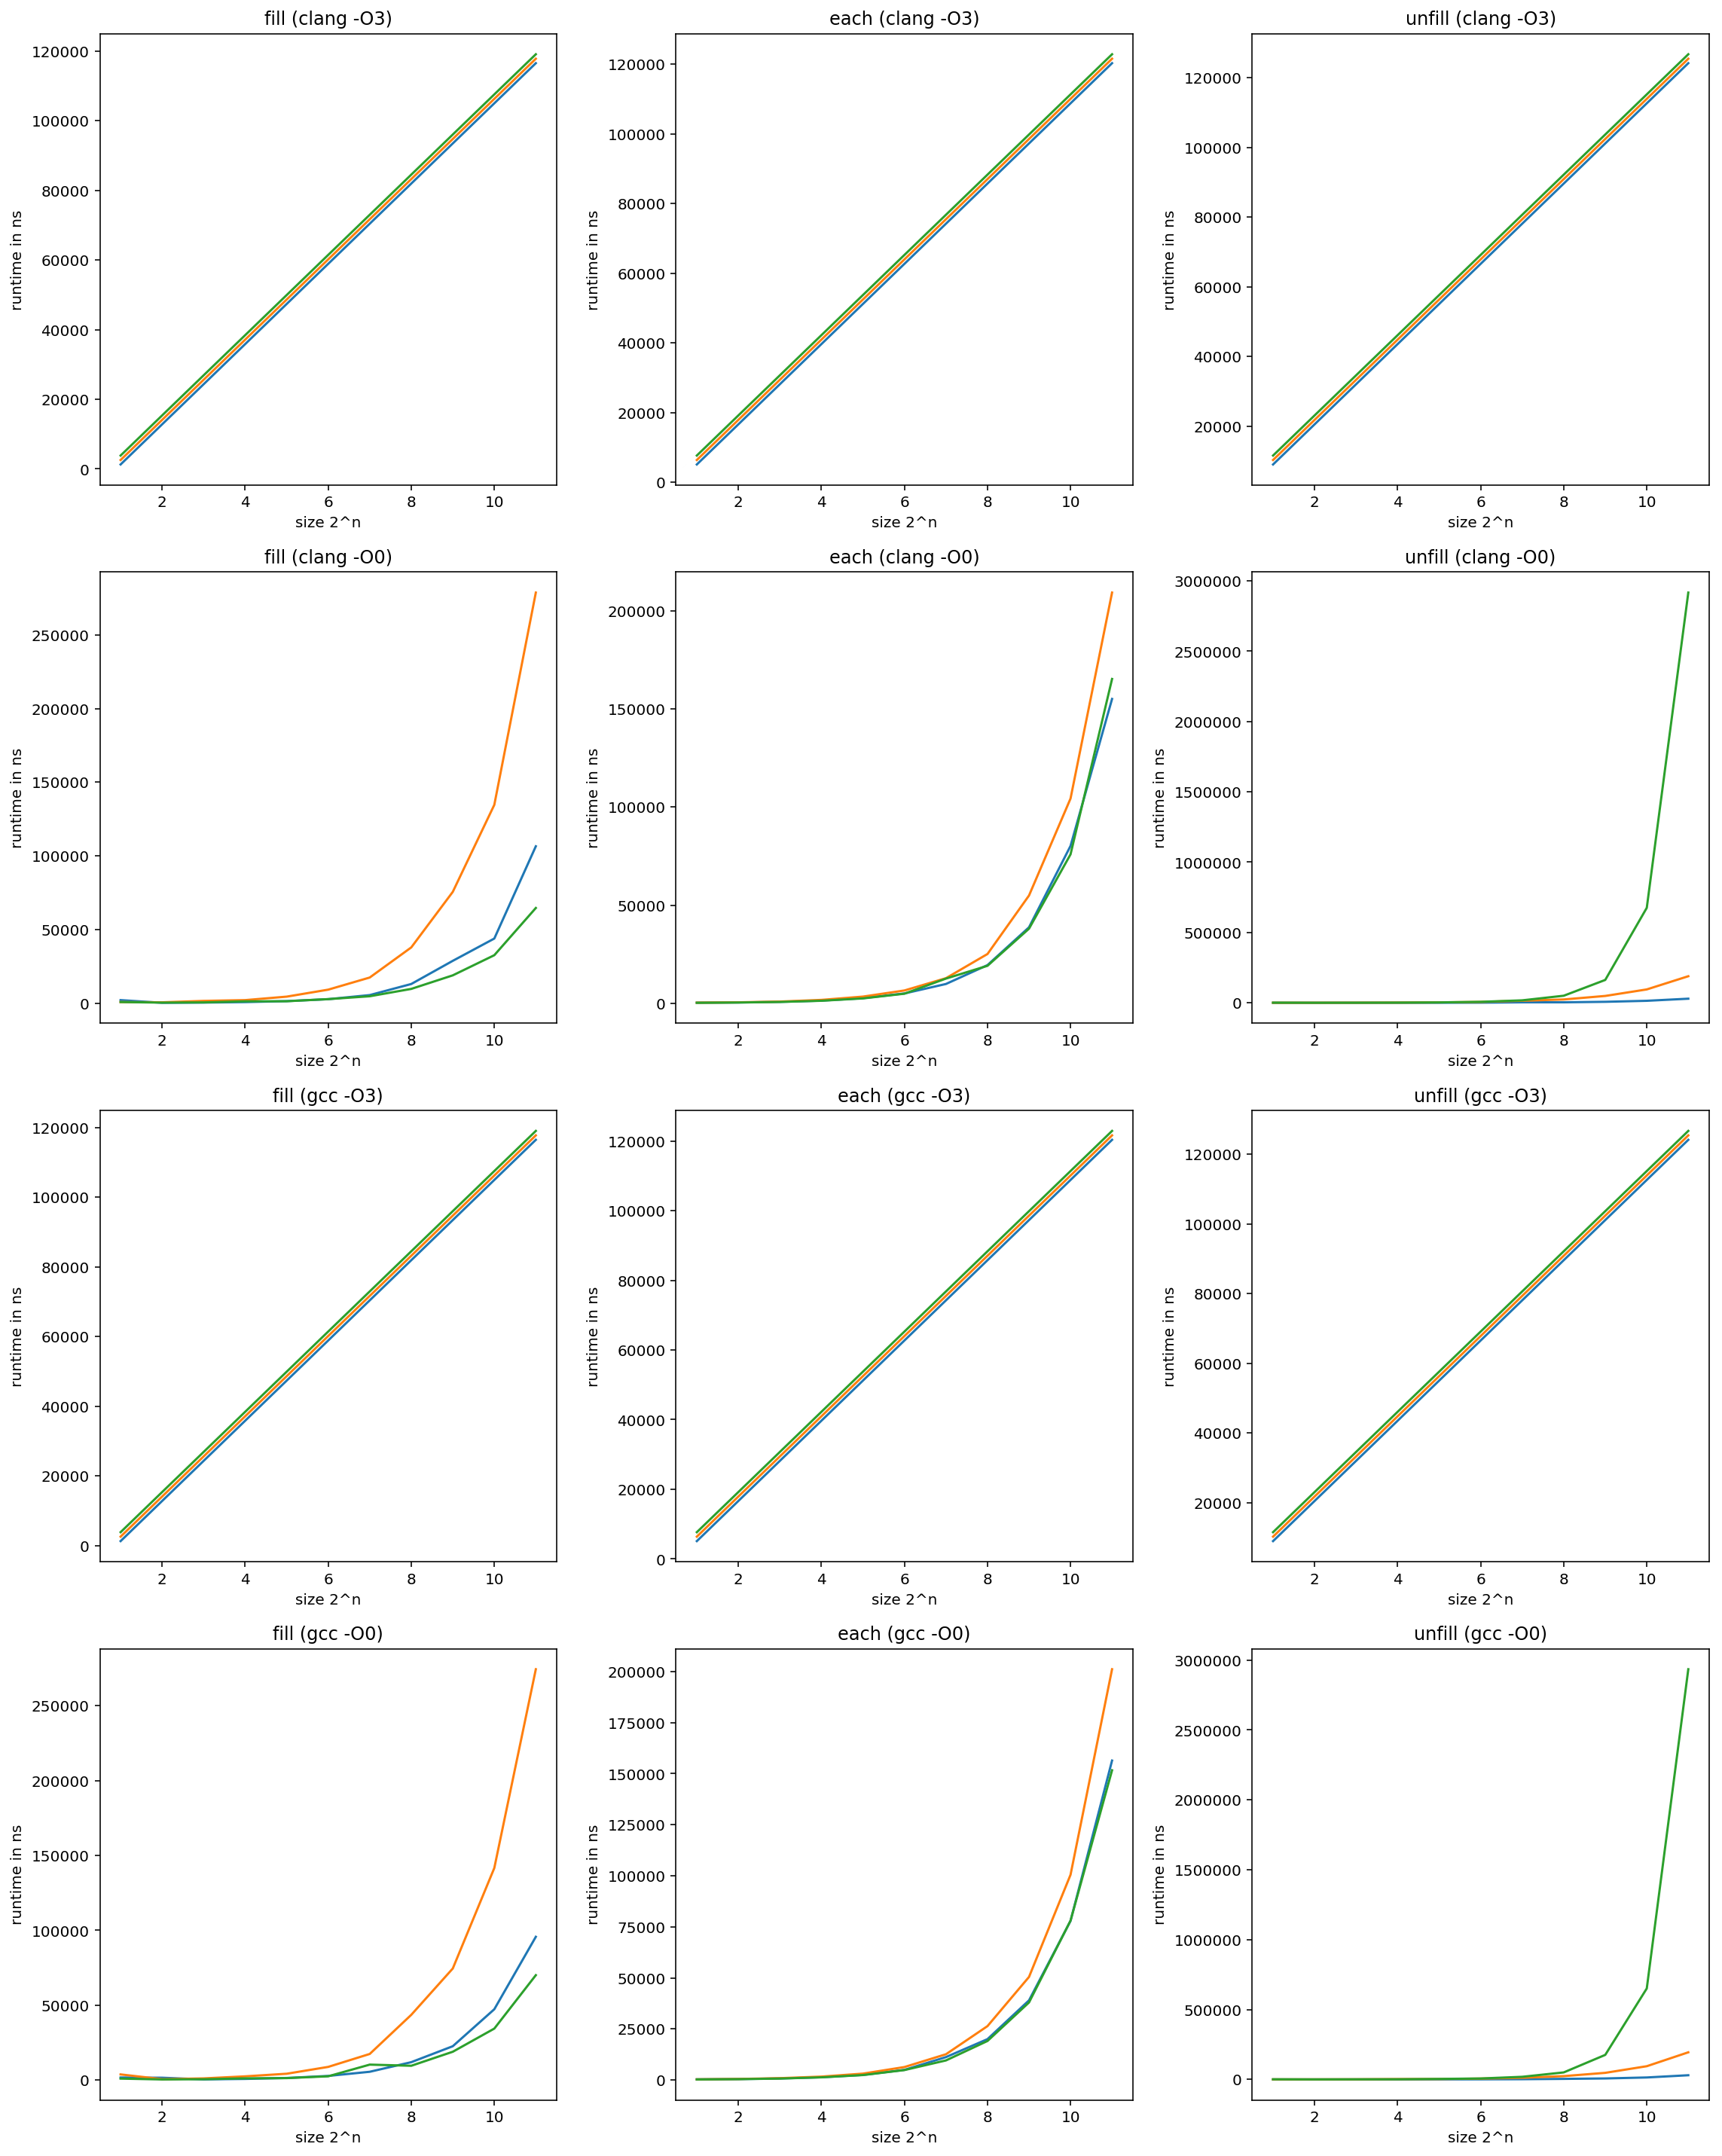

In [4]:
clang_opt = pd.read_csv('runtime-clang-optimized.csv')
clang_unopt = pd.read_csv('runtime-clang-unoptimized.csv')

gcc_opt = pd.read_csv('runtime-gcc-optimized.csv')
gcc_unopt = pd.read_csv('runtime-gcc-unoptimized.csv')

fig, axis = plt.subplots(4, 3, figsize=(16, 20))

titles = ['clang -O3', 'clang -O0', 'gcc -O3', 'gcc -O0']
datasets = [clang_opt, clang_unopt, gcc_opt, gcc_unopt] 

for i, (title, dataset) in enumerate(zip(titles, datasets)):
    for j, op in enumerate(dataset['operation'].unique()):
        axis[i][j].set_title(f'{op} ({title})')
        axis[i][j].set_xlabel('size 2^n')
        axis[i][j].set_ylabel('runtime in ns')

        for ct in dataset['container'].unique():
            df = dataset[(dataset['container'] == ct) & (dataset['operation'] == op)]
        
            axis[i][j].plot(df['n'], df['nanoseconds'], label=ct)
        
plt.tight_layout()
plt.show()